# Librerias utilizadas

In [1]:
%pip install wget

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import wget
import scipy.io.wavfile as wave
import IPython
from scipy.linalg import toeplitz, inv

# 1. Reproducir diferentes excitaciones u<sub>k</sub>(n) con un parlante y medir su respuesta y<sub>k</sub>(n) con un micrófono, con N = 48000 y fs = 48 kHz.

## a. Señal de música

In [3]:
song_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/buttercup_1seg.wav?raw=true'
song_file = wget.download(song_url)

In [4]:
fs, song_array = wave.read(str(song_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(song_array)))
IPython.display.Audio(song_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [5]:
song_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/Buttercup.wav'
song_out_file = wget.download(song_out_url)
fs, song_out_array = wave.read(str(song_out_file))
IPython.display.Audio(song_out_array,rate=fs)

## b. Una señal de voz

In [6]:
voice_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Entradas/Okay_1seg.wav'
voice_file = wget.download(voice_url)

In [7]:
fs, voice_array = wave.read(voice_file)
print("fs = "+str(fs))
print("Number of samples = "+ str(len(voice_array)))
IPython.display.Audio(voice_array,rate=fs)

fs = 48000
Number of samples = 48000


Respuesta medida:

In [8]:
voice_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/okay.wav'
voice_out_file = wget.download(voice_out_url)
fs, voice_out_array = wave.read(str(voice_out_file))
IPython.display.Audio(voice_out_array,rate=fs)

## c. Una señal cuadrada de f<sub>0</sub>=100 Hz

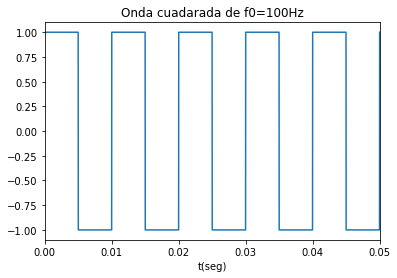

In [9]:
t= np.linspace(start=0,stop=1,num=48000)
f = 100         #Frecuencia fundamental de la onda cuadrada
square_wave = sig.square(2 * np.pi * f * t)
plt.plot(t, square_wave)
plt.title("Onda cuadarada de f0=100Hz")
plt.xlim(left=0,right=0.05)
plt.xlabel("t(seg)")
plt.show()

In [10]:
IPython.display.Audio(square_wave,rate=fs)

Respuesta medida:

In [11]:
square_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/square.wav'
square_out_file = wget.download(square_out_url)
fs, square_out_array = wave.read(str(square_out_file))
IPython.display.Audio(square_out_array,rate=fs)

## d. Un barrido lineal de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [12]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1
K= (f1-f0)/T
x = 2 * np.pi * t * ( f0 + 0.5 * K * t)
lineal_sweep = np.sin(x)

In [13]:
IPython.display.Audio(lineal_sweep,rate=fs)

Respuesta medida:

In [14]:
lineal_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/lineal.wav'
lineal_out_file = wget.download(lineal_out_url)
fs, lineal_out_array = wave.read(str(lineal_out_file))
IPython.display.Audio(lineal_out_array,rate=fs)

## e. Un barrido exponencial de frecuencia con f<sub>0</sub> = 20 Hz, f<sub>1</sub> = 20 kHz y T = 1 s

In [15]:
t= np.linspace(start=0,stop=1,num=48000)
f1=20e3
f0=20
T=1.
K= (f1/f0)**(1./T)
x = 2 * np.pi * f0 * ( ( (K**t)-1 )/math.log(K) )
exp_sweep = np.sin(x)

In [16]:
IPython.display.Audio(exp_sweep,rate=fs)

Respuesta medida:

In [17]:
exp_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/exp.wav'
exp_out_file = wget.download(exp_out_url)
fs, exp_out_array = wave.read(str(exp_out_file))
IPython.display.Audio(exp_out_array,rate=fs)

## f. Ruido blanco guassiano de media cero

In [18]:
noise = np.random.randn(48000)
IPython.display.Audio(noise,rate=fs)

Respuesta medida:

In [19]:
noise_out_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/noise.wav'
noise_out_file = wget.download(noise_out_url)
fs, noise_out_array = wave.read(str(noise_out_file))
IPython.display.Audio(noise_out_array,rate=fs)

# 2. Estimar el filtro óptimo en cada uno de los casos. Graficar J<sub>min</sub> en función de M, y determinar el valor óptimo de M para cuando no se observe mejora de J<sub>min</sub> con aumento de M. Para ese valor de M, determinar ε y los autovalores de la matriz de autocorrelación. Ordenar los autovalores de mayor a menor, y graficar su distribución.

In [20]:
def GetCorrelations(u_n,d_n):
    r = np.correlate(u_n,np.conj(u_n), mode='full') / len(u_n)
    p = np.correlate(u_n, np.conj(d_n), mode='full') / len(u_n)
    return r,p

def get_eigenvalues(u_n,r,M):
    r_mat = toeplitz(r[r.argmax():r.argmax()+M])
    ev = np.linalg.eig(r_mat)
    return ev

def wiener_coefs(u_n, d_n, r, p, M):

    r_mat = toeplitz(r[r.argmax():r.argmax()+M])
    r_inv = inv(r_mat)
    start = len(p)//2
    p_m = np.flip(p[start-M:start] )

    w_o = np.dot(r_inv, p_m)
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.conj(p_m),w_o )
    var_d_hat = p_m.dot(w_o)
    Jmin = var_d - var_d_hat
    epsilon = Jmin/(var_d+1e-19)
    return w_o, Jmin, epsilon

def search_opt_M(data, desired,M_list):
    Jmin_s = []
    eps_s = []
    r, p = GetCorrelations(data,desired)
    for m in M_list:
        print('Starting order ', m)
        w_o, Jmin, epsilon = wiener_coefs(data,desired,r,p,m)
        Jmin_s.append(Jmin)
        eps_s.append(epsilon)
    filtered = filterW(data, w_o)
    return filtered, Jmin_s, eps_s
    
        
def filterW(data, w_o):
    samples = len(data)
    M = len(w_o)
    filtered = np.zeros(samples)
    filtered = sig.filtfilt(w_o, [1], data)
    return filtered

def calc_error(filtered, desired):
    var_d = np.var(d_n)
    var_d_hat = np.matmul(np.matmul(p, r_inv), p.reshape((-1, 1)))
    Jmin = var_d - var_d_hat
    eps = 1 - var_d_hat/var_d
    return Jmin, eps

def plot_u_and_d(u,d):
    plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Ampitude')
    plt.xlabel('Samples')
    plt.title('u(n) vs d(n)')
    plt.grid('on')
    plt.plot(u, label='u(n)')
    plt.plot(d, label='d(n)')
    plt.legend(loc='upper center')
    plt.show()

def plot_Jmin_and_eps(M_s, Jmin_s, eps_s):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(121)
    plt.ylabel('Jmin')
    plt.xlabel('M')
    plt.title('Jmin vs M')
    plt.grid('on')
    plt.plot(M_s, Jmin_s, marker='o', linestyle='--', color='r', label='Square')
    plt.subplot(122)
    plt.ylabel('epsilon')
    plt.xlabel('M')
    plt.title('epsilon vs M')
    plt.grid('on')
    plt.plot(M_s, eps_s, marker='o', linestyle='--', color='r', label='Square')
    plt.show()

def plot_ev(ev):
    plt.figure(num=None, figsize=(15,6), dpi=80, facecolor='w', edgecolor='k')
    plt.hist(ev, bins=20)
    plt.title('Eigenvalues Distribution')
    plt.ylabel('Multiplicity')
    plt.xlabel('Eigenvalue')
    plt.grid('on')
    plt.show()

## Voice Signal

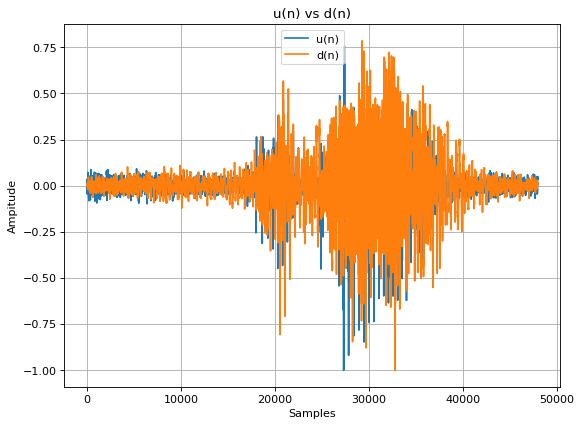

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


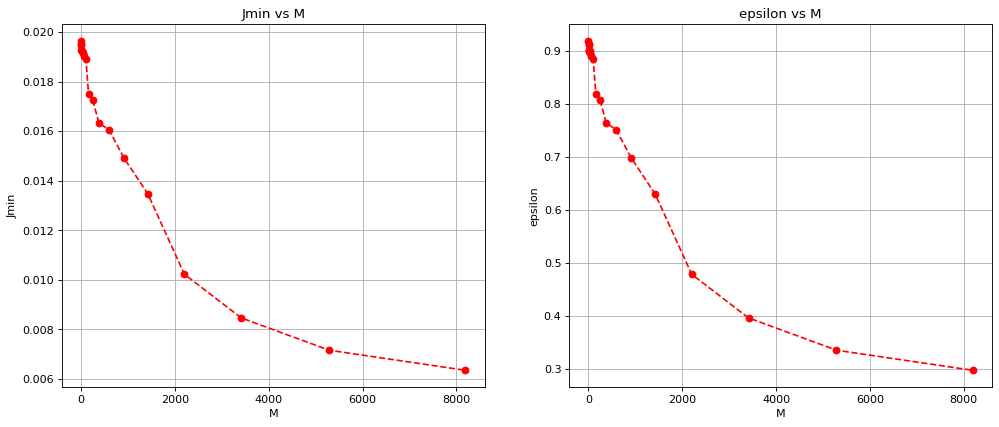

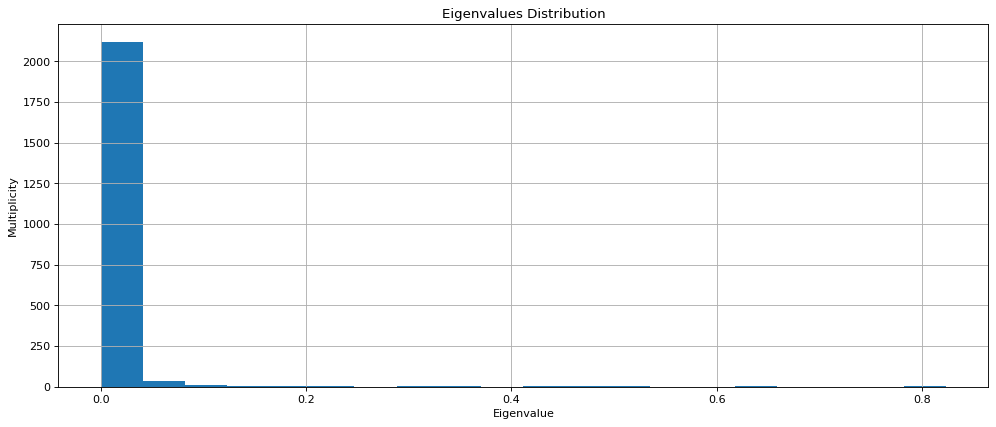

In [39]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = voice_array
desired = voice_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-4]
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [40]:
IPython.display.Audio(filtered,rate=fs)

## Song Signal

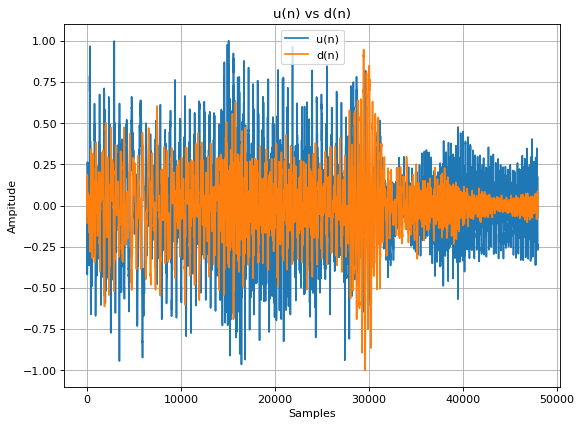

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


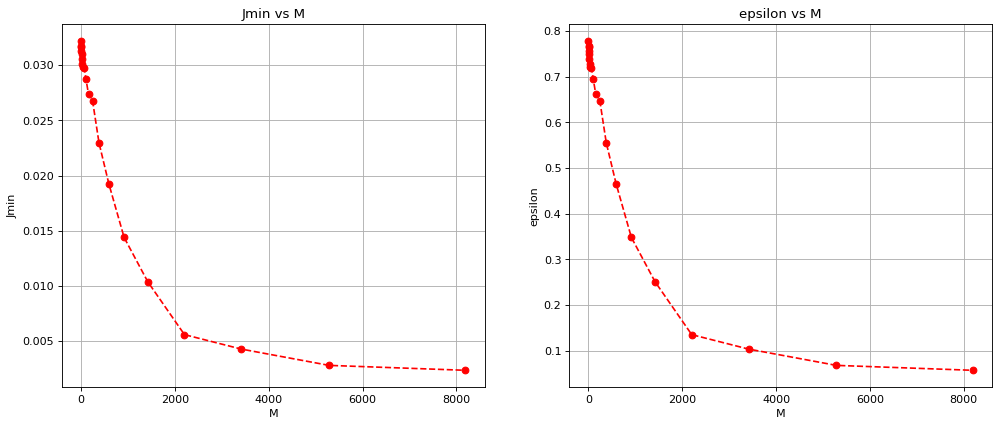

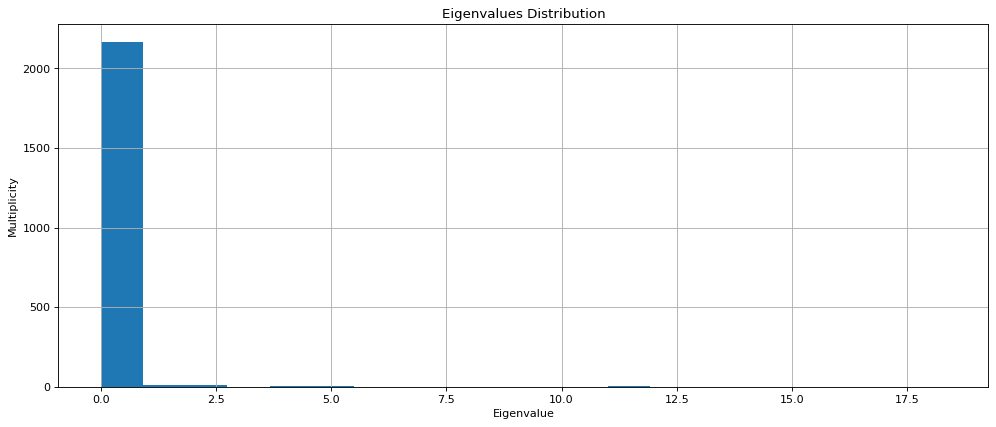

In [41]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = song_array
desired = song_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n,M_values )
plot_Jmin_and_eps(M_values , Jmin_s, eps_s)
m_opt = M_values [-4]
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [42]:
IPython.display.Audio(filtered,rate=fs)

## Square Signal

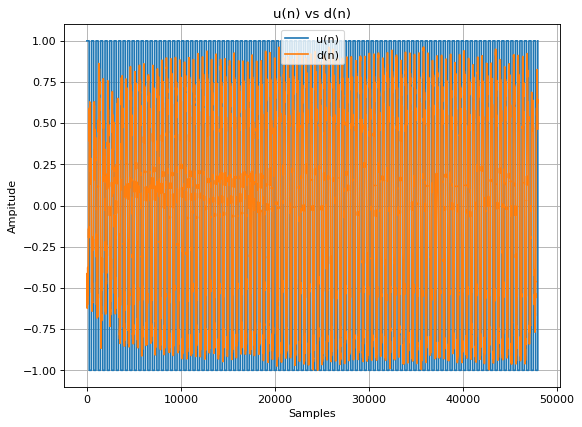

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


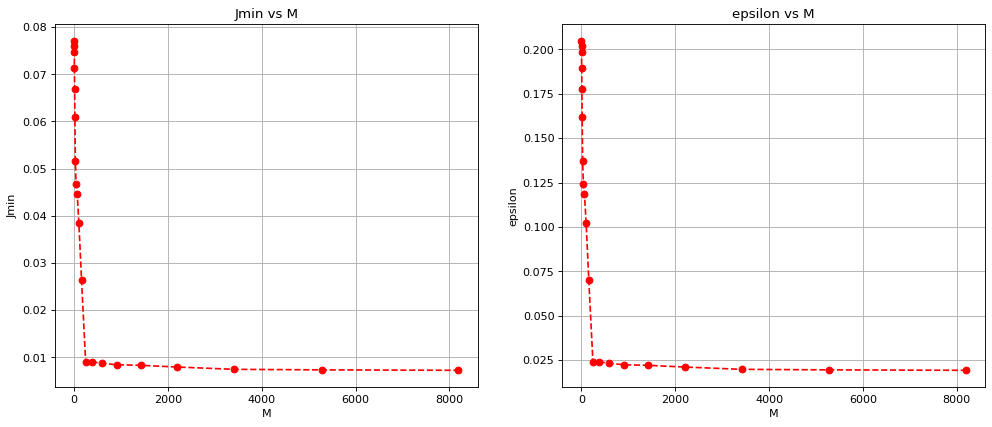

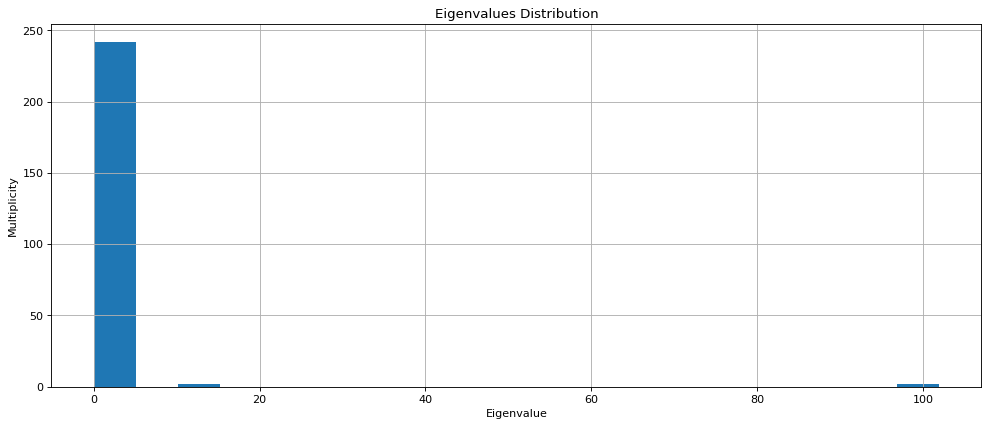

In [25]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = square_wave
desired = square_out_array
u_n = (data-data.mean())/np.amax(abs(data))
d_n = (desired-desired.mean())/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = 246
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [26]:
IPython.display.Audio(filtered,rate=fs)

## Lineal Signal

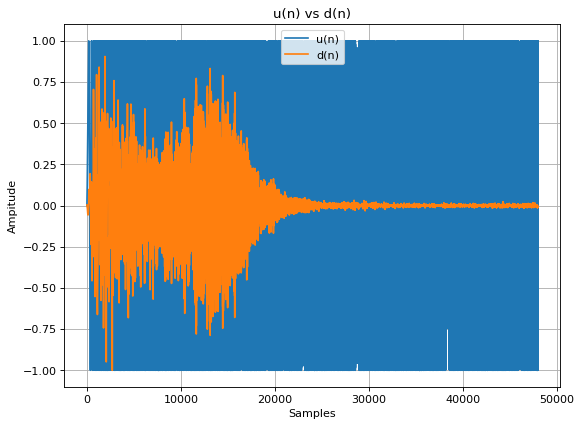

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


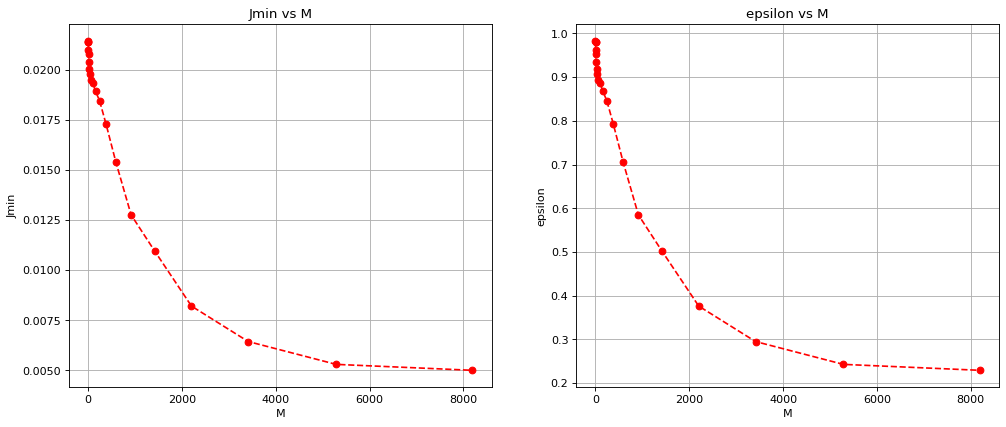

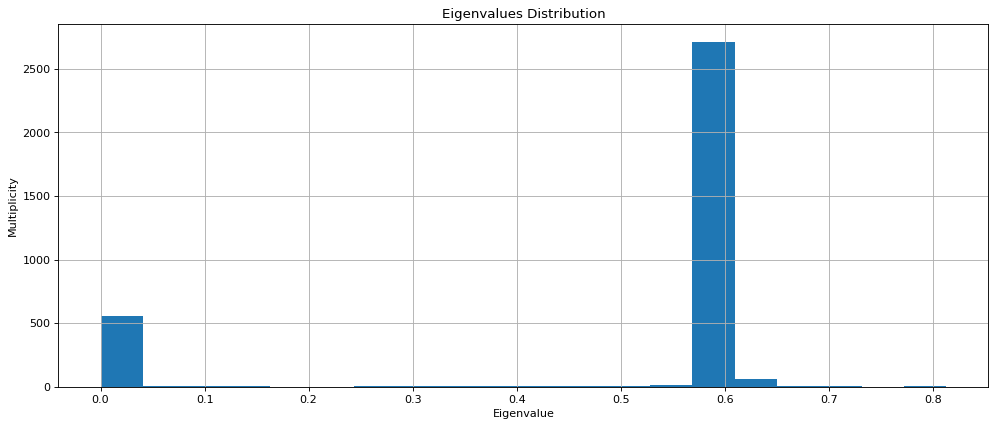

In [27]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = lineal_sweep
desired = lineal_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s= search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-3]
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [28]:
IPython.display.Audio(filtered,rate=fs)

## Exp Signal

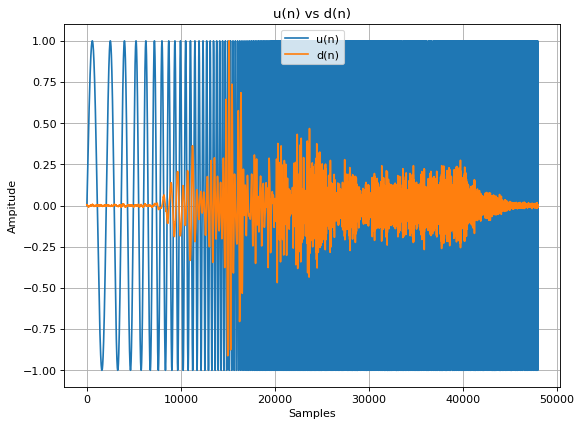

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


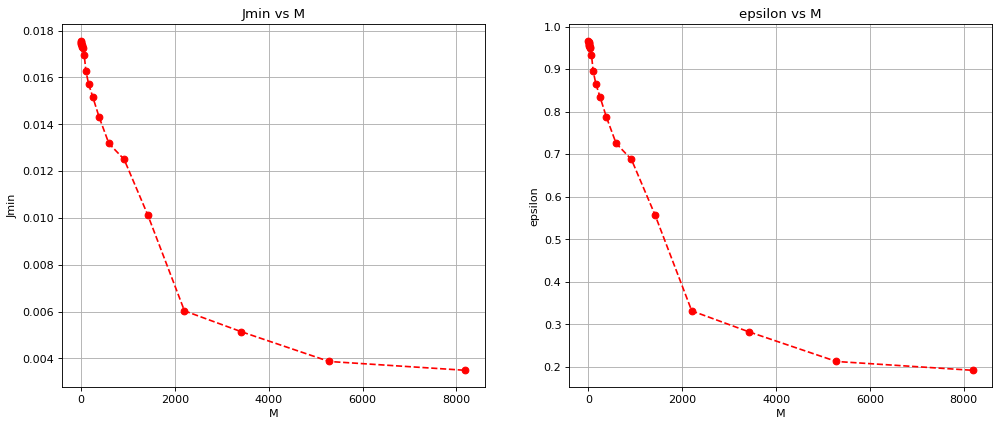

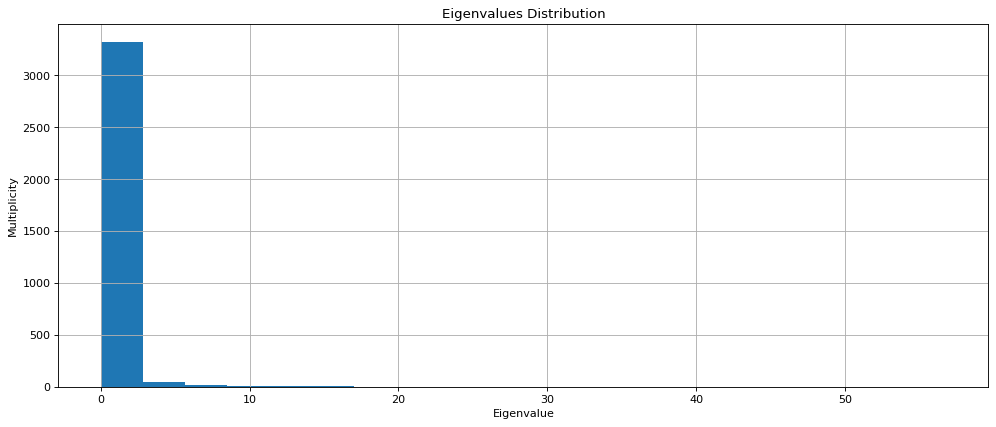

In [43]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = exp_sweep
desired = exp_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-3]
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [30]:
IPython.display.Audio(filtered,rate=fs)

## Noise Signal

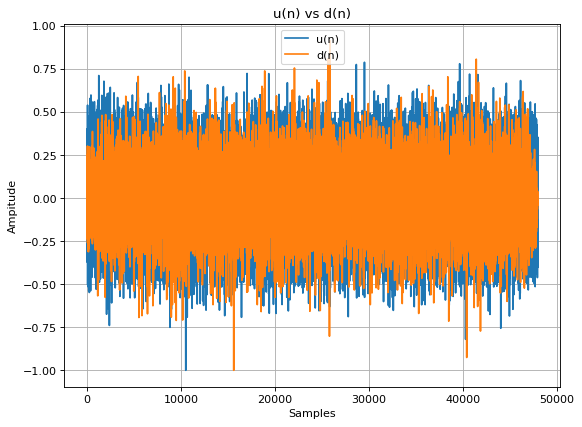

Starting order  2
Starting order  3
Starting order  4
Starting order  7
Starting order  11
Starting order  17
Starting order  27
Starting order  42
Starting order  66
Starting order  102
Starting order  159
Starting order  246
Starting order  382
Starting order  592
Starting order  917
Starting order  1421
Starting order  2203
Starting order  3413
Starting order  5287
Starting order  8192


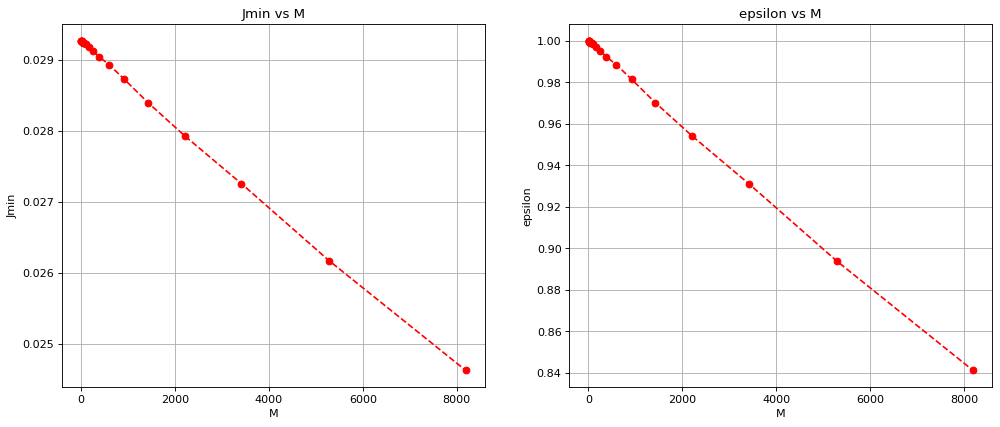

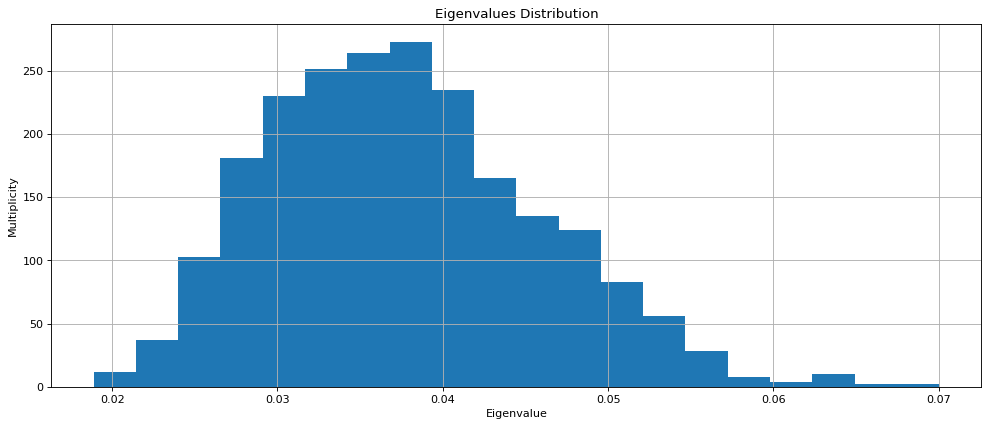

In [44]:
M_values = np.logspace(start =1, stop=13, num=20, base=2, dtype=int)

data = noise
desired = noise_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
plot_u_and_d(u_n, d_n)
filtered, Jmin_s, eps_s = search_opt_M(u_n, d_n, M_values)
plot_Jmin_and_eps(M_values, Jmin_s, eps_s)
m_opt = M_values[-4]
eps_opt = eps_s[-1]
autocorr, _ = GetCorrelations(u_n,d_n)
ev, _ = get_eigenvalues(u_n,autocorr,m_opt)
plot_ev(ev)

In [32]:
IPython.display.Audio(filtered,rate=fs)

# 3 Realizar un contraste cualitativo y cuantitativo entre los filtros óptimos de los diferentes casos.

Comparando las graficas anteriores se pueden notar los siguientes valores de $\epsilon$ logrados,ordenados de menor al mayor:

1.   Onda cuadrada: $\epsilon=0.025$ $,M=246$
2.   Cancion: $\epsilon=0.06$ $,M=5287$
3.   Barrido exponencial: $\epsilon=0.2$ $,M=5287$
4.   Barrido lineal: $\epsilon=0.25$ $,M=5287$
5.   Voz humana: $\epsilon=0.3$ $,M=8192$
6.   Ruido blanco: $\epsilon=0.922$ $,M=4096$

Como menor valor de $\epsilon$ se corresponde con una mejor estimacion, se tiene que la lista tambien esta ordenada de la mejor estimacion(onda cuadrada) hacia la peor(ruido blanco). Asimsimo se puede notar que la estimacion para la señal cuadrada fue la mas rapida en estancarse en un valor de J<sub>min</sub>, ya que a partir de M=246 se puede apreciar que no hay mejoras apreciables en el valor de $\epsilon$.

Al escuchar las señales de audio filitrada correspondiente al ruido blanco asi como tambien la de voz , se puede notar que efectivamente difiere notablemente de como suena la medicion realizada. Por otro lado, la version filtrada que se obtuvo para el barrido lineal y el exponencial son muy similares a las grabaciones.

A nivel personal, a pesar de tener el menor valor de $\epsilon$, el resultado obtenido para la onda cuadrada difiere notablemente de como se escucha la grabacion verdadera del cuarto. Esto probablemente se debe al numero reducido de frecuencias que ocupa la señal (su fundamental y sus primeros armonicos impares) ademas de que se pierde la informacion de los armonicos mas altos de la onda cuadrada debido a la atenuacion que sufre la señal debido al parlante y al cuarto.Al perderse dicha informacion el filtro no encuentra la correlacion entre la entrada y la deseada para dichos componentes de frecuencia y esto cambia notablemente como se escucha el resultado.

Esto tambien explica porque los barridos lineales y exponenciales son las que se parecen mas a sus grabaciones, debido a que ocupan todo el rango de frecuecias audibles, entonces se obtiene informacion de como esta correlacionada la medicion con la entrada en todo el rango de frecuencias.

Debido a que el barrido exponencial es la señal que suena mas parecida a la grabacion correspondiente, sumado a que es la tercera señal con el menor $\epsilon$.Se decidio utilizar los coeficientes de la misma para caracterizar la respuesta de la habitacion.




# 4 A partir del contraste del punto anterior, seleccionar el filtro que mejor representa la respuesta de la habitación. Filtrar un segmento de audio con este segmento. Escucharlo con auriculares y compararlo con la señal escuchada en la habitación.

Teniendo en cuenta lo mencionado previamente se toma como filtro mas representativo el que se obtuvo de la señal de musica

In [45]:
test_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP2/Grabaciones/Entradas/Angel_Thesis.wav?raw=true'
test_file = wget.download(test_url)
fs, test_array = wave.read(str(test_file))
print("fs = "+str(fs))
print("Number of samples = "+ str(len(test_array)))

fs = 48000
Number of samples = 1779949


Se utiliza el siguiente segmento de audio como señal a filtrar

In [46]:
start = 20*fs
end = start+5*fs
test_fragment = test_array[start:end]
test_fragment = test_fragment.sum(axis=1)/2.
IPython.display.Audio(test_fragment,rate=fs)

Filtramos la señal utilizando la mejor estimacion del filtro

In [47]:
data = exp_sweep
desired = exp_out_array
u_n = data/np.amax(abs(data))
d_n = desired/np.amax(abs(desired))
m=5287
r, p = GetCorrelations(data,desired)
w_o, Jmin, epsilon = wiener_coefs(u_n, d_n, r, p, m)
test_norm = (test_fragment-test_fragment.mean())/test_fragment.max()
filtered_test = filterW(test_norm,w_o)

Comparamos el reslutado del filtro con la señal grabada en la habitacion.

240000
Grabacion en el cuarto:
Resultado del Filtro:


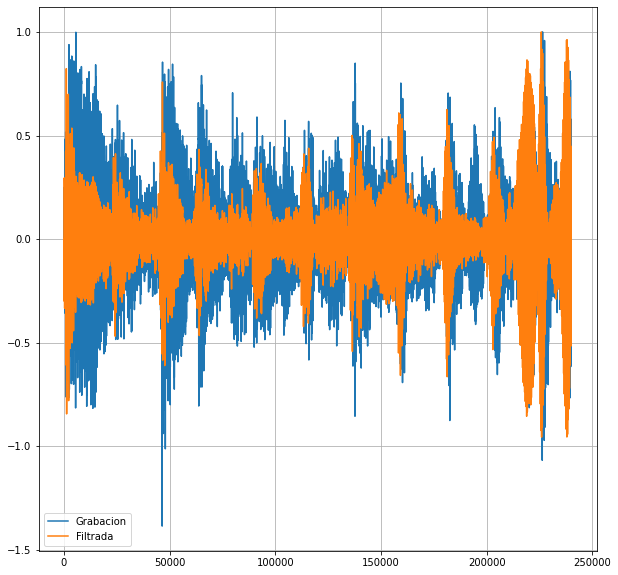

In [49]:
test_medida_url = 'https://raw.githubusercontent.com/ManuMollon261297/PASA/master/TP2/Grabaciones/Salidas/test_medida.wav'
test_medida_file = wget.download(test_medida_url)
fs, medicion_array = wave.read(str(test_medida_file))
print(len(medicion_array))
print("Grabacion en el cuarto:")
IPython.display.Audio(medicion_array,rate=fs)
print("Resultado del Filtro:")
IPython.display.Audio(filtered_test,rate=fs)

plt.figure(figsize=(10,10))
plt.plot(medicion_array/medicion_array.max(), label= "Grabacion")
plt.plot(filtered_test/filtered_test.max(), label="Filtrada")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
print("Grabacion en el cuarto:")
IPython.display.Audio(medicion_array,rate=fs)

Grabacion en el cuarto:


In [51]:
print("Resultado del Filtro:")
IPython.display.Audio(filtered_test,rate=fs)

Resultado del Filtro:


Comparando el audio de ambas señales, se puede notar que la filtrada se escucha como si la fuente del audio estuviese mas lejos que en la grabacion actual. El audio de la filtrada suena mas bajo, esto tambien se puede apreciar en la grafica en el tiempo de ambas señales donde se ve que la señal grabada tiene una menor atenuacion que la fltrada.

Una explicacion posible que podemos pensar para justificar la diferencia entre los audios es que los coeficientes obtenidos no son del todo representativos de la respuesta del cuarto.En primer lugar, porque el cuarto atenua demasiado las altas frecuencias (se puede observar en la grafica del tiempo del barrido)por lo que se pierde informacion de la banda superior audible. Asi como tambien, porque el numero M de muestras elegido probablemente sea muy bajo para caracterizar adecuadamente al cuarto, ya que con la $fs=48000Hz$ y el $M=5287$ se corresponde a alrededor de $\triangle T=\frac{5287*1000}{48000}ms=110ms$ lo cual suele ser un tiempo muy pequeño para caracterizar la respuesta de una habitacion, esto depende de los tiempos de reverberencia de la misma.